[1.]
Coefficients: [ 1.31700739  1.82239411 -0.46094279  0.39660313  0.87813235  0.83697635
  1.01349266  0.74174499]
B: -2.8239780463541657
Learning rate 0.01
Lowest cost: 0.5465660738292198


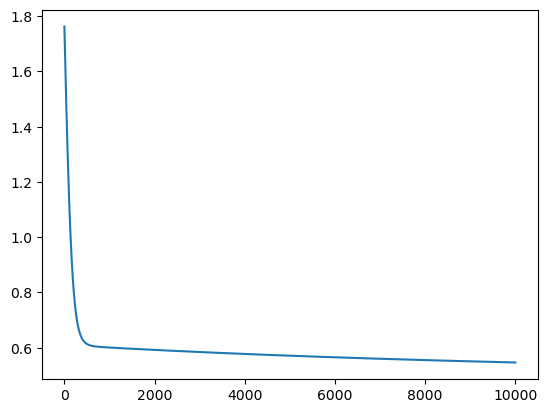

In [31]:
import matplotlib.pyplot as plt
import numpy as np


class LogisticRegression:
    def __init__(self, csv_path, y_column_name):
        self.fields = np.loadtxt(csv_path, delimiter=',', max_rows=1, dtype=str)
        self.np_data_arr = np.loadtxt(csv_path, delimiter=',', skiprows=1,dtype=float)
        self.Y_train = self.np_data_arr[:, np.where(self.fields == y_column_name)[0]].flatten()
        self.X_train = np.delete(self.np_data_arr, np.where(self.fields == y_column_name)[0], 1)
        self.alpha = .001
        self.colCount = self.X_train.shape[1]
        self.w_list = np.array([1.0 for i in range(self.colCount)])
        self.b = 0.0
        self.costs = []
        self.max = [self.X_train[:,i].max() for i in range(self.colCount)]
        for i in range(self.colCount):
            self.X_train[:,i] /= self.max[i]

    def __str__(self):
        plt.plot(self.costs)
        return f'Coefficients: {self.w_list}\nB: {self.b}\nLearning rate {self.alpha}\nLowest cost: {self.costs[-1]}'

    def set_alpha(self, alpha):
        self.alpha = alpha

    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))
    def predict(self,x, scaled = True):
        if not scaled:
            for i in range(x.shape[1]):
                x[:,i] /= self.max[i]
        return self.sigmoid(np.matmul(x,self.w_list) + self.b)

    def cost(self,g):
        m = self.X_train.shape[0]
        return -(np.sum(self.Y_train * np.log(g) + (1 - self.Y_train) * np.log(1-g)))/m

    def _update(self):
        m = self.X_train.shape[0]
        g = self.predict(self.X_train)
        err = g - self.Y_train
        dj_db = np.sum(err)/m
        dj_dw = (self.X_train.T @ err)/m
        self.w_list = self.w_list - (self.alpha * dj_dw)
        self.b = self.b - (self.alpha * dj_db)
        self.costs.append(self.cost(g))
        return self.w_list, self.b

    def train(self,iterations):
        for i in range(iterations):
            self.w_list, self.b = self._update()
        return True

if __name__ == '__main__':
    l = LogisticRegression(csv_path='data/diabetes.csv', y_column_name='Outcome')
    l.set_alpha(0.01)
    l.train(10000)
    print(l.predict(np.array([[10,115,0,0,0,35.3,0.134,29]])))
    print(l)





